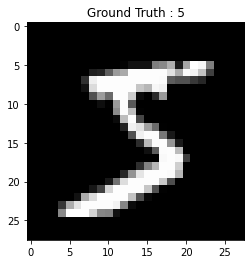

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
235/235 [==============================] - 8s 35ms/step - loss: 0.3190 - accuracy: 0.9007 - val_loss: 0.

In [5]:
from keras.datasets import mnist
import numpy as np
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
visible = Input(shape=(dimData,))
hidden = Dense(dimData)(visible)
model = Model(inputs=visible, outputs=hidden)
hidden1 = Dense(512, activation='relu')(visible)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(512, activation='relu')(hidden2)
output = Dense(10, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# print(model.predict_classes(test_data[[0],:]))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


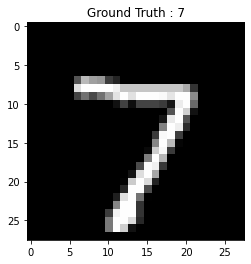

Epoch 1/5
235/235 [==============================] - 6s 25ms/step - loss: 0.2735 - accuracy: 0.9160 - val_loss: 0.2124 - val_accuracy: 0.9286
Epoch 2/5
235/235 [==============================] - 6s 25ms/step - loss: 0.0931 - accuracy: 0.9714 - val_loss: 0.1134 - val_accuracy: 0.9641
Epoch 3/5
235/235 [==============================] - 6s 25ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.1003 - val_accuracy: 0.9668
Epoch 4/5
235/235 [==============================] - 6s 25ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.1048 - val_accuracy: 0.9692
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0833 - accuracy: 0.9755
Evaluation result on Test Data : Loss = 0.08329327404499054, accuracy = 0.9754999876022339
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if y

In [6]:

import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# display the first image in the training data
plt.imshow(test_images[0, :, :], cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()

# process the data
# 1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
# scale data
train_data /= 255.0
test_data /= 255.0
# change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
img_class = model.predict_classes(test_data[[0], :])
prediction = img_class[0]
classname = img_class[0]
print("Class: ", classname)

Epoch 1/5
235/235 [==============================] - 9s 37ms/step - loss: 0.4169 - accuracy: 0.8733 - val_loss: 0.2795 - val_accuracy: 0.9076
Epoch 2/5
235/235 [==============================] - 9s 37ms/step - loss: 0.1577 - accuracy: 0.9523 - val_loss: 0.1528 - val_accuracy: 0.9498
Epoch 3/5
235/235 [==============================] - 9s 37ms/step - loss: 0.0990 - accuracy: 0.9687 - val_loss: 0.1276 - val_accuracy: 0.9586
Epoch 4/5
235/235 [==============================] - 9s 37ms/step - loss: 0.0702 - accuracy: 0.9775 - val_loss: 0.0774 - val_accuracy: 0.9749
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9764
Evaluation result on Test Data : Loss = 0.07296795397996902, accuracy = 0.9764000177383423


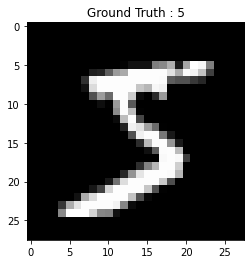

In [7]:

import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(600, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/5
235/235 [==============================] - 6s 25ms/step - loss: 0.4044 - accuracy: 0.8722 - val_loss: 0.2655 - val_accuracy: 0.9175
Epoch 2/5
235/235 [==============================] - 6s 24ms/step - loss: 0.2044 - accuracy: 0.9372 - val_loss: 0.1909 - val_accuracy: 0.9394
Epoch 3/5
235/235 [==============================] - 6s 25ms/step - loss: 0.1532 - accuracy: 0.9518 - val_loss: 0.1449 - val_accuracy: 0.9555
Epoch 4/5
235/235 [==============================] - 6s 25ms/step - loss: 0.1315 - accuracy: 0.9583 - val_loss: 0.1872 - val_accuracy: 0.9394
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1275 - accuracy: 0.9611
Evaluation result on Test Data : Loss = 0.12752793729305267, accuracy = 0.9610999822616577


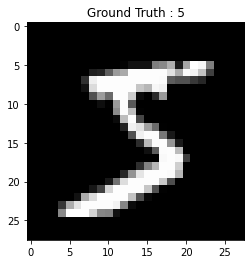

In [8]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
#train_data /=255.0
#test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
#model.add(Dense(600, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


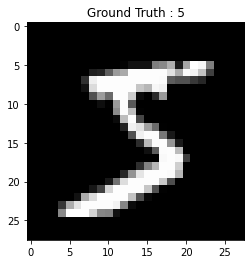

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
235/235 [==============================] - 8s 35ms/step - loss: 0.3296 - accuracy: 0.8971 - val_loss: 0.

In [9]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
visible = Input(shape=(dimData,))
hidden = Dense(dimData)(visible)
model = Model(inputs=visible, outputs=hidden)
hidden1 = Dense(512, activation='relu')(visible)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(512, activation='relu')(hidden2)
output = Dense(10, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# print(model.predict_classes(test_data[[0],:]))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
